In [ ]:
# default_exp core

# AlphaZero starter template

In [ ]:
#hide
from nbdev.showdoc import *

# MCTS

In [ ]:
import numpy as np

In [ ]:
import networkx as nx

In [ ]:
rng = np.random.default_rng()

## Overview

In [ ]:
# placeholder model
def model(state, action, n=3):
    actions = rng.random(n)
    actions /= sum(actions)
    return actions

`MCTree`: the search tree containing all nodes, queried by `MCTS`. Pruned after each turn to save space.

In [ ]:
class MCTree():
    def __init__(self):
        ...

`MCTS`: search algorithm. Responsible for running simulations, selecting the next action, and maintaining the search tree.

In [ ]:
# class MCTS():
#     def __init__(self, n_sims, c_puct=1.0, noise_alpha=0.03, noise_epsilon=0.25):
#         self.n_sims = n_sims
#         self.c_puct = c_puct
#         self.noise_alpha = noise_alpha
#         self.noise_epsilon = noise_epsilon


#     def simulate(self, node):
#         """Runs one simulation."""
#         action_idx = self.sim_select(node.actions)
#         if node.actions[action_idx] is None:
#             new_state = compute_state(action_idx, node.valid_actions)
            
            

#     def sim_select(actions):
#         """Selects an action to simulate."""
#         return np.argmax(actions)

### Building the Search Tree

Creating a node

In [ ]:
def create_node(state: np.ndarray, action_probs: np.ndarray, valid_actions: np.ndarray, value: float = 0.0, branch_nodes=None, parent=None, index=0):
    node = {'state':state, 'action_probs':action_probs, 'valid_actions':valid_actions, 'visits':1, 'value':value, 
            'branch_nodes':[None]*len(action_probs), 'parent':parent, 'index':index}
    return node


In [ ]:
def create_random_node(parent=None, index=0):
    state = rng.integers(0,2,(4,4))
    action_probs = rng.random(4)
    valid_actions = rng.integers(0,2,4)
    value = rng.random()
    return create_node(state, action_probs, valid_actions, value=value, branch_nodes=[None]*5, parent=None, index=index)

Initializing the search tree and add a branch

In [ ]:
root = create_random_node()

In [ ]:
current_node = root

select_idx = 3

if current_node['branch_nodes'][select_idx] is None:
    print(current_node['branch_nodes'])
    current_node['branch_nodes'][select_idx] = create_random_node()
    print(current_node['branch_nodes'])

else:
    current_node = current_node['branch_nodes'][select_idx]

[None, None, None, None]
[None, None, None, {'state': array([[0, 1, 1, 1],
       [0, 1, 0, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 0]]), 'action_probs': array([0.57124398, 0.94230255, 0.2410921 , 0.43919801]), 'valid_actions': array([0, 1, 0, 0]), 'visits': 1, 'value': 0.6755543170947854, 'branch_nodes': [None, None, None, None], 'parent': None, 'index': 0}]


#### Random Simulation: create new nodes on new

In [ ]:
%%time

graph = nx.Graph()

sims = 400 # each sim ends by creating a new node
root = create_random_node()
n_actions = 4
n_nodes=0

graph.add_node(n_nodes)
n_nodes += 1

# run a simulation
for i in range(sims):
    node = root
    select_idx = rng.integers(0, n_actions)
    
    # explore the search tree until new state found
    while node['branch_nodes'][select_idx] is not None:
        node = node['branch_nodes'][select_idx]
        node['visits'] += 1

        select_idx = rng.integers(0, n_actions)

    # create new node when new state found
    n_nodes += 1
    graph.add_edge(node['index'], n_nodes)
    node['branch_nodes'][select_idx] = create_random_node(parent=node, index=n_nodes)
    node = node['branch_nodes'][select_idx]


    # update values of all nodes on current path
    parent = node['parent']
    while parent is not None:
        value = node['value']
        node = parent
        node['value'] += value




CPU times: user 8.09 ms, sys: 3.41 ms, total: 11.5 ms
Wall time: 9.08 ms


#### Visualize Search Tree


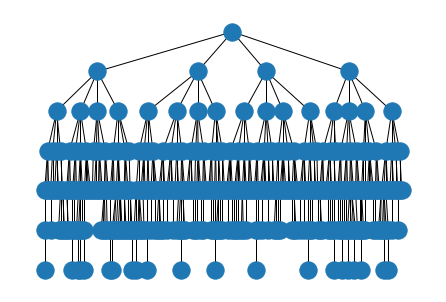

In [ ]:
pos = nx.nx_agraph.graphviz_layout(graph)
pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
nx.draw(graph, pos)

`compute_state` computes new game states given an `action` and `state`. It's called whenever a new state is encountered. Its output is stored as a new `node`'s `state` and `available_actions`.

In [ ]:
def compute_state(state, action_idx, valid_actions):
    assert valid_actions[action_idx] == 1

    pass
    # TODO


## Exploitation and Exploration functions

The *exploitation* function favors high returns and consistently winning paths. *Exploration* initially favors new paths and eventually favors winning paths.

Reference: [Deep Learning and the Game of Go [14.2.1]](https://livebook.manning.com/book/deep-learning-and-the-game-of-go/chapter-14/39) | [MIT 16.412J s16 Cognitive Robotics: Advanced 4. Monte Carlo Tree Search](https://www.youtube.com/watch?v=xmImNoDc9Z4)

```
exploit(s,a) = total_val(s) / visit_count(s,a)

explore(s,a) = c_puct * action_probabilities(s,a) * sqrt(visit_count(previous_node)) / (1 + visit_count(s,a))
```

`total_val` is the sum of all node values on the current path up to the current node. `visit_counts` is the number of visits to the current node.

In [ ]:
rng = np.random.default_rng(0)
x = rng.dirichlet([0.03]*3, )
x, x.size

(array([9.98888057e-01, 1.11194276e-03, 7.99958888e-17]), 3)